In [1]:
# use kernel/conda env called "oliviaJupyter" 
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from datetime import datetime
import imageio
from scipy.ndimage import gaussian_filter, uniform_filter
%matplotlib  widget

In [2]:
# load in the file to plot if I haven't run the above code this session
workdir = '/data/ocp4/LagunaSalada/Data_and_Figs/'
# for the entire region 
x1=0; y1=0; x2=18000; y2=3600
f1 = gdal.Open(workdir+'/5_tpc/cumulative_tpc.r4', gdal.GA_ReadOnly)
tpcCum = f1.ReadAsArray()

In [3]:
# set up the box to plot for where I did full res unwrapping/analysis 
boxY = [1000,1000,1750,1750,1000]
boxX = [14000,17000,17000,14000,14000]; 

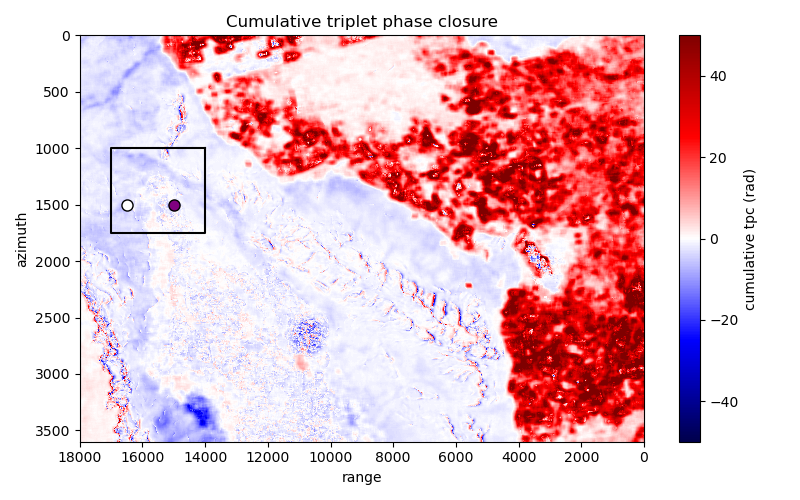

In [4]:
#plot cumulative tpc for entire region over entire time period
fig= plt.subplots(1,1,figsize=(8, 5), tight_layout=True)
plt.subplot(1,1,1)
plt.imshow(tpcCum, vmin=-50, vmax=50, cmap='seismic', aspect='auto', \
                interpolation='nearest', extent = [x1,x2,y2,y1])
# can add vmin=-20, vmax=20, to above line of code 
plt.plot(boxX,boxY,'k-')
plt.plot(15000,1500,'o',color='purple',markersize=8,mec='k')
plt.plot(16500,1500,'o',color='white',markersize=8,mec='k')#
#plt.plot(14000,3400,'o',color='royalblue',markersize=8,mec='k')
#plt.plot(5610,965,'o',color='olivedrab',markersize=8,mec='k')

plt.ylabel('azimuth')
plt.xlabel('range')
plt.colorbar(label='cumulative tpc (rad)')
plt.title("Cumulative triplet phase closure")
plt.xlim([x2,x1])
plt.ylim([y2,y1])
plt.show()

#plt.savefig("cum_tpc.png", transparent=True)